In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel('신뢰성공학 실습 6주차BrakeReliability.xlsx')
data.head() # 처음 데이터를 가져올때는 data, 조작할내용은 아래와 같이 df로 정의하는게 좋음

,ID,Days,Type
0,101,462,1
1,101,730,1
2,112,364,1
3,112,391,1
4,112,548,1


In [2]:
df=data[['Days','Type']]
df

,Days,Type
0,462,1
1,730,1
2,364,1
3,391,1
4,548,1
...,...,...
74,416,2
75,93,2
76,205,2
77,264,2


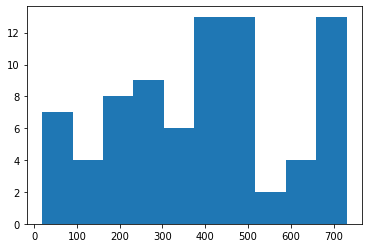

In [3]:
plt.hist(df['Days'])
plt.show() # Days가 0에서 50사이에 몇개 이런식

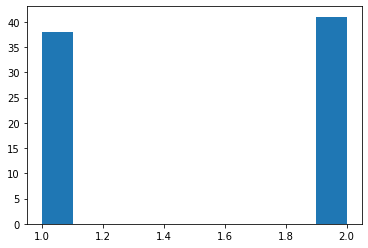

In [4]:
plt.hist(df['Type'])
plt.show()

In [5]:
df.Type.unique()

array([1, 2])

In [7]:
df[df['Type']==1].head(3)

,Days,Type
0,462,1
1,730,1
2,364,1


In [8]:
type1_item=df[df['Type']==1]['Days']
type2_item=df[df['Type']==2]['Days']
type1_item

0     462
1     730
2     364
3     391
4     548
5     724
6     302
7     444
8     500
9     730
10    250
11    500
12    724
13     88
14    724
15    272
16    421
17    552
18    625
19    719
20    481
21    710
22    431
23    710
24    367
25    710
26    635
27    650
28    708
29    402
30    700
31     33
32    687
33    287
34    687
35    317
36    498
37    657
Name: Days, dtype: int64

In [12]:
type1_item.describe()

count     38.000000
mean     519.473684
std      191.394843
min       33.000000
25%      393.750000
50%      524.000000
75%      706.000000
max      730.000000
Name: Days, dtype: float64

In [13]:
import pandas as pd
qq=pd.DataFrame(data={'a':{'b':2,'c':3},'r':{'b':3,'c':4}})
qq

,a,r
b,2,3
c,3,4


In [14]:
qq.describe()

,a,r
count,2.000000,2.000000
mean,2.500000,3.500000
std,0.707107,0.707107
min,2.000000,3.000000
25%,2.250000,3.250000
50%,2.500000,3.500000
75%,2.750000,3.750000
max,3.000000,4.000000


In [15]:
type1_MTTF=type1_item.describe()['mean']
type1_B25=type1_item.describe()['25%']
print('type1_MTTF = ',type1_MTTF)
print('type1_B25 = ',type1_B25)

type1_MTTF =  519.4736842105264
type1_B25 =  393.75


Type 1
Group 
     Days  Type
0    462     1
1    730     1
2    364     1
3    391     1
4    548     1
5    724     1
6    302     1
7    444     1
8    500     1
9    730     1
10   250     1
11   500     1
12   724     1
13    88     1
14   724     1
15   272     1
16   421     1
17   552     1
18   625     1
19   719     1
20   481     1
21   710     1
22   431     1
23   710     1
24   367     1
25   710     1
26   635     1
27   650     1
28   708     1
29   402     1
30   700     1
31    33     1
32   687     1
33   287     1
34   687     1
35   317     1
36   498     1
37   657     1


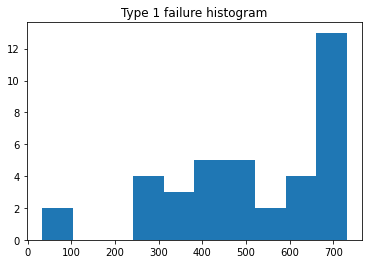

Type 2
Group 
     Days  Type
38   203     2
39   211     2
40   277     2
41   373     2
42   511     2
43   293     2
44   503     2
45   173     2
46   242     2
47   464     2
48    39     2
49    91     2
50   119     2
51   148     2
52   306     2
53   461     2
54   382     2
55   460     2
56   250     2
57   434     2
58   192     2
59   448     2
60   369     2
61   448     2
62    22     2
63   447     2
64    54     2
65   441     2
66   194     2
67   432     2
68    61     2
69   419     2
70    19     2
71   185     2
72   419     2
73   187     2
74   416     2
75    93     2
76   205     2
77   264     2
78   415     2


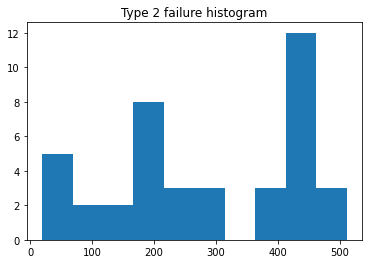

In [16]:
grouped=df.groupby('Type')
for type_, group in grouped: # type_ -> 1, group -> df에서 해당 type_의 값들
  print('Type',type_)
  print('Group \n', group)
  plt.hist(group['Days'])
  plt.title('Type {0} failure histogram'.format(type_))
  plt.show()

In [17]:
in_dex=['({0},{1})'.format(t,t+50)for t in range(0,750,50)] # t : range(0,750,50) => 0,50,100,..,700
cdf = pd.DataFrame(index=in_dex,columns=['Type 1','Type 2'])
for i,t in zip(cdf.index,range(0,750,50)): # i : cdf.index => (0,50),(50,100),..,(700,750)   t : range(0,750,50) => 0,50,100,..,700
  cdf.loc[i,'Type 1']=sum(type1_item<t+50) # t+50 보다 작은 값들의 갯수를 나타냄
  cdf.loc[i,'Type 2']=sum(type2_item<t+50)
cdf # -> 누적데이터를 보여줌

,Type 1,Type 2
"(0,50)",1,3
"(50,100)",2,7
"(100,150)",2,9
"(150,200)",2,14
"(200,250)",2,18
"(250,300)",5,22
"(300,350)",7,23
"(350,400)",10,26
"(400,450)",14,36
"(450,500)",17,39


In [19]:
i=cdf.index
t=range(0,750,50)
list(zip(i,t))

[('(0,50)', 0),
 ('(50,100)', 50),
 ('(100,150)', 100),
 ('(150,200)', 150),
 ('(200,250)', 200),
 ('(250,300)', 250),
 ('(300,350)', 300),
 ('(350,400)', 350),
 ('(400,450)', 400),
 ('(450,500)', 450),
 ('(500,550)', 500),
 ('(550,600)', 550),
 ('(600,650)', 600),
 ('(650,700)', 650),
 ('(700,750)', 700)]

In [22]:
# F(t) 누적확률분포 불신뢰도
t=range(0,800,50) # x축 정의한것. range(0,800,50) : 0부터 750까지
type1_Ft=[0]+[x/len(type1_item)for x in cdf['Type 1']] # 리스트라 [0]인것, 즉 [0, ... ]
type2_Ft=[0]+[x/len(type2_item)for x in cdf['Type 2']]
print(len(type1_item))
print(cdf['Type 1'])
print(type1_Ft)
type1_Ft

38
(0,50)        1
(50,100)      2
(100,150)     2
(150,200)     2
(200,250)     2
(250,300)     5
(300,350)     7
(350,400)    10
(400,450)    14
(450,500)    17
(500,550)    20
(550,600)    21
(600,650)    23
(650,700)    27
(700,750)    38
Name: Type 1, dtype: object
[0, 0.02631578947368421, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.13157894736842105, 0.18421052631578946, 0.2631578947368421, 0.3684210526315789, 0.4473684210526316, 0.5263157894736842, 0.5526315789473685, 0.6052631578947368, 0.7105263157894737, 1.0]


[0,
 0.02631578947368421,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.13157894736842105,
 0.18421052631578946,
 0.2631578947368421,
 0.3684210526315789,
 0.4473684210526316,
 0.5263157894736842,
 0.5526315789473685,
 0.6052631578947368,
 0.7105263157894737,
 1.0]

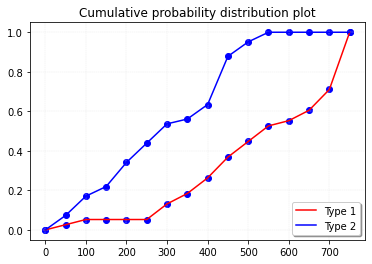

In [23]:
plt.plot(t,type1_Ft,color='r',label='Type 1') # x축, y축, 색깔, 라벨
plt.plot(t,type2_Ft,color='b',label='Type 2')

plt.scatter(t,type1_Ft,color='b')
plt.scatter(t,type2_Ft,color='b')

plt.title('Cumulative probability distribution plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower right')
plt.show()

In [24]:
# R(t) 누적확률분포 신뢰도
t=range(0,800,50)
type1_Rt=[1]+[1-x/len(type1_item)for x in cdf['Type 1']]
type2_Rt=[1]+[1-x/len(type2_item)for x in cdf['Type 2']]

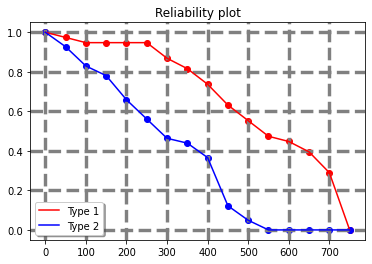

In [25]:
plt.plot(t,type1_Rt,color='r',label='Type 1')
plt.plot(t,type2_Rt,color='b',label='Type 2')
plt.scatter(t,type1_Rt,color='r')
plt.scatter(t,type2_Rt,color='b')

plt.title('Reliability plot')
plt.grid(True,lw=3.4,ls='--',c='.50') # grid : 그래프 보조선 지정, lw : 보조선 두께, ls : 보조선 스타일, c : 보조선 색깔 
plt.legend(shadow=True,fancybox=True,loc='lower left')
plt.show()


In [26]:
cdf

,Type 1,Type 2
"(0,50)",1,3
"(50,100)",2,7
"(100,150)",2,9
"(150,200)",2,14
"(200,250)",2,18
"(250,300)",5,22
"(300,350)",7,23
"(350,400)",10,26
"(400,450)",14,36
"(450,500)",17,39


In [27]:
cdf.iloc[8,1] # -> index : (400,450), Column : Type2

36

In [28]:
len(cdf.index) # 0부터 14까지 15개

15

In [29]:
list(range(1,15))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [30]:
# 고장밀도함수 f(t)
t= [t_+25 for t_ in range(0,750,50)] # range(0,750,50) -> 0,50,100,...,700

type1_ft=[cdf.iloc[0,0]/(len(type1_item)*50)] # 50으로 나눈 이유 : t가 50만큼 흐를동안 고장난 개수이므로, 또한 []으로 해줌으로써 리스트형식으로 만듦.
for i in range(1,len(cdf.index)):
  type1_ft.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/(len(type1_item)*50)) # append : list에 값 추가
type2_ft=[cdf.iloc[0,1]/(len(type2_item)*50)]
for i in range(1,len(cdf.index)):
  type2_ft.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/(len(type1_item)*50))
 

In [31]:
type1_ft

[0.0005263157894736842,
 0.0005263157894736842,
 0.0,
 0.0,
 0.0,
 0.0015789473684210526,
 0.0010526315789473684,
 0.0015789473684210526,
 0.002105263157894737,
 0.0015789473684210526,
 0.0015789473684210526,
 0.0005263157894736842,
 0.0010526315789473684,
 0.002105263157894737,
 0.005789473684210527]

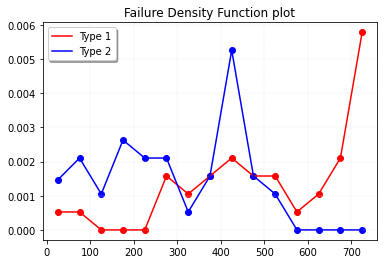

In [32]:
plt.plot(t,type1_ft,color='r',label='Type 1') # t와 type1_ft 모두 위에서 정의해줌
plt.plot(t,type2_ft,color='b',label='Type 2')

plt.scatter(t,type1_ft,color='r')
plt.scatter(t,type2_ft,color='b')

plt.title('Failure Density Function plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper left')
plt.show()

In [33]:
# 순간고장률 h(t)
t = [t_+25 for t_ in range(0,750,50)]

type1_failure = 0
type1_ht=[cdf.iloc[0,0]/(len(type1_item)*50)]
for i in range(1, len(cdf.index)): # i는 1부터 14까지
    type1_ht.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/((len(type1_item)-type1_failure)*50)) # 전체에 대한 비율인 f(t)와 다르게, h(t)는 생존한 제품에 대한 비율이므로
    # type1_failure이라는 변수를 통해 생존제품갯수를 구한다.
    type1_failure += cdf.iloc[i,0]-cdf.iloc[i-1,0]
    
type2_failure = 0
type2_ht=[cdf.iloc[0,1]/(len(type2_item)*50)]
for i in range(1, len(cdf.index)):
    type2_ht.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/((len(type2_item)-type2_failure)*50))
    type2_failure += cdf.iloc[i,1]-cdf.iloc[i-1,1]  

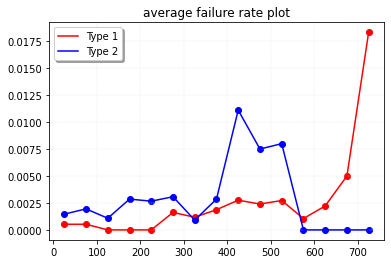

In [34]:
plt.plot(t,type1_ht, color = 'r',label = 'Type 1')
plt.plot(t,type2_ht, color = 'b',label = 'Type 2')

plt.scatter(t,type1_ht, color = 'r')
plt.scatter(t,type2_ht, color = 'b')

plt.title('average failure rate plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper left')
plt.show()

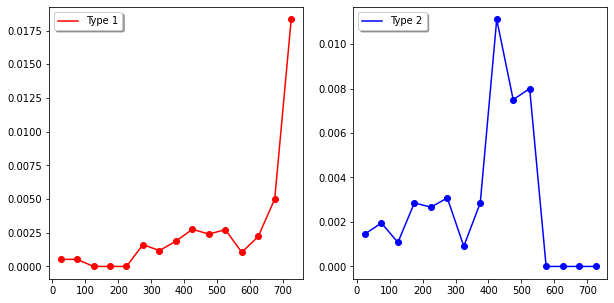

In [35]:
fig = plt.figure()
fig.set_size_inches(10,5) # 크기지정
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)

ax_1.plot(t,type1_ht, color = 'r',label = 'Type 1')
ax_1.scatter(t,type1_ht, color = 'r')
ax_1.legend(shadow=True,fancybox=True,loc='upper left')

ax_2.plot(t,type2_ht, color = 'b',label = 'Type 2')
ax_2.scatter(t,type2_ht, color = 'b')
ax_2.legend(shadow=True,fancybox=True,loc='upper left')

plt.show()

In [ ]:
# 오케이